In [25]:
#Arthur Takashi Kanno 11806872
#Pedro Ian de Almeida Soares 12554327

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data_df = pd.read_csv("circles_and_squares.csv")
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


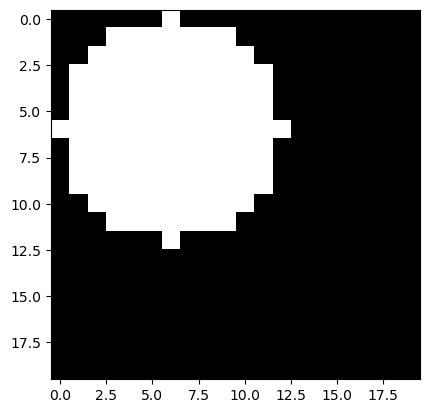

In [19]:
data = data_df.to_numpy()
img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

In [20]:
Xd_treinamento = data[:800, :]
Xd_test = data[800:, :]

In [21]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb):
    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = np.zeros((Ne * Nmb + 1, M + 1))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))
    eta = eta / Nb

    for k in range(Ne):
        np.random.shuffle(Xd)
        xb = Xd[:, 0 : M + 1]
        db = Xd[:, [M + 1]]
        for l in range(Nmb):
            dmb = db[l * Nb : (l + 1) * Nb, :]
            xmb = xb[l * Nb : (l + 1) * Nb, :]
            y = np.sign(xmb @ (W[k*Nmb + l, :]).reshape(-1, 1))
            e = dmb - y
            W[k*Nmb + l + 1, :] = (W[k*Nmb + l, :].reshape(-1, 1) + eta*(xmb.T @ e)).reshape(1, -1)
    return W

In [22]:
x = Xd_treinamento[:, 0 : ((Xd_treinamento.shape[1]) - 1)]
d = Xd_treinamento[:, -1].reshape(-1, 1)
xt = Xd_test[:, 0 : ((Xd_test.shape[1]) - 1)]
xt = np.hstack((np.ones((xt.shape[0], 1)), xt))
dt = Xd_test[:, -1].reshape(-1, 1)
x1 = np.hstack((np.ones((x.shape[0], 1)), x))

#Após as testagens os melhores valores de Nt, Ne, Nb e eta foram os que seguem abaixo
Nt = x.shape[0]
Ne = 15
Nb = 10
eta = 0.033333

W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
e = dt - (np.sign(xt @ (W[-1, :]).reshape(-1, 1)))
print('porcentagem de erro do perceptron no teste:',sum(np.abs(e))/400)
e = d - (np.sign(x1 @ (W[-1, :]).reshape(-1, 1)))
print('porcentagem de erro do perceptron no teste:',sum(np.abs(e))/1600)


porcentagem de erro do perceptron no teste: [0.455]
porcentagem de erro do perceptron no teste: [0.36875]


In [23]:
#Codigo utilizado para a testagem de difentes volores de Ne, Nb e eta com relação ao erro no teste segue abaixo

e0 = np.zeros(1000)
id = 0
e = np.zeros((200, 1))

for i in range (10):
  Ne = (i+11)
  for j in range (10):
      Nb = ((j+1)*2)
      for k in range (10):
        eta = 1/((k + 1)*10)
        e2 = 0.0
        for l in range (20):
          W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
          e = dt - (np.sign(xt @ (W[-1, :]).reshape(-1, 1)))
          e2 += (sum(np.abs(e)))/400
        e0[id] = e2*5
        print('erro percentual da iteracao:', e0[id])
        id += 1


C:\Users\User\AppData\Local\Temp\ipykernel_7708\3279370370.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e0[id] = e2*5


erro percentual da iteracao: 34.474999999999994
erro percentual da iteracao: 34.949999999999996
erro percentual da iteracao: 33.59999999999999
erro percentual da iteracao: 36.55
erro percentual da iteracao: 35.6
erro percentual da iteracao: 36.800000000000004
erro percentual da iteracao: 34.64999999999999
erro percentual da iteracao: 35.075
erro percentual da iteracao: 34.724999999999994
erro percentual da iteracao: 35.96249999999999
erro percentual da iteracao: 35.4625
erro percentual da iteracao: 35.449999999999996
erro percentual da iteracao: 37.087500000000006
erro percentual da iteracao: 35.97500000000001
erro percentual da iteracao: 35.85
erro percentual da iteracao: 34.724999999999994
erro percentual da iteracao: 34.525
erro percentual da iteracao: 35.52499999999999
erro percentual da iteracao: 36.65
erro percentual da iteracao: 35.49999999999999
erro percentual da iteracao: 33.75000000000001
erro percentual da iteracao: 34.99999999999999
erro percentual da iteracao: 35.85
erro 

KeyboardInterrupt: 

In [24]:
#Codigo utilizado para a testagem de difentes volores de Ne, Nb e eta com relação ao erro no treinamento segue abaixo

e1 = np.zeros(1000)
id = 0
e = np.zeros((800, 1))

for i in range (10):
  Ne = (i+11)
  for j in range (10):
      Nb = ((j+1)*2)
      for k in range (10):
        eta = 1/((k + 1)*10)
        e2 = 0
        for l in range (20):
          W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
          e = d - (np.sign(x1 @ (W[-1, :]).reshape(-1, 1)))
          e2 += (sum(np.abs(e)))/1600
        e1[id] = e2*5
        print(e1[id])
        id += 1

C:\Users\User\AppData\Local\Temp\ipykernel_7708\295806478.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e1[id] = e2*5


24.70625
25.334374999999998
24.628124999999997
25.390625000000004
25.634375
25.690625000000004
25.459375
24.571875000000002
25.956250000000004
26.603125
26.39999999999999
25.259374999999995
25.065624999999997
24.959375
26.800000000000004
24.39687500000001
24.396875
25.087499999999995
24.796874999999993
25.709374999999998
25.984374999999993
27.949999999999996
26.6625
25.028124999999996
26.537500000000005
25.728125000000006
25.390625000000004
26.956249999999997
25.359374999999996
26.840625
28.293749999999992
26.20625
25.171875
26.553125
27.843750000000007
26.40625
27.84375


KeyboardInterrupt: 

(1000,)
32.85


Text(0.5, 1.0, 'Erros ao longo de diferentes parâmetros')

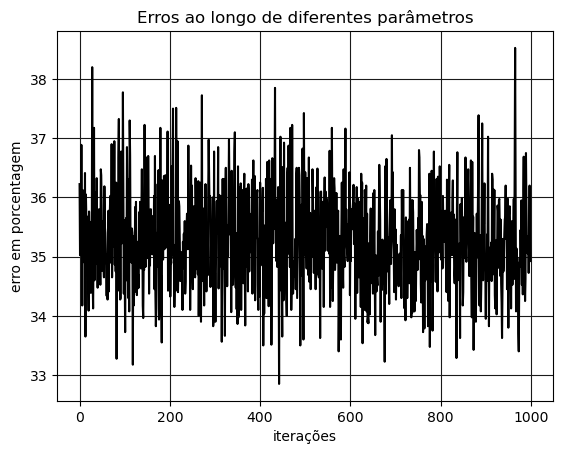

In [61]:
print(e0.shape)
print(np.min(e0))

plt.plot(e0, "k", label="LMS")
plt.xlabel("iterações")
plt.ylabel("erro em porcentagem")
plt.grid(axis="x", color="0.1")
plt.grid(axis="y", color="0.1")
plt.title(
    "Erros ao longo de diferentes parâmetros"
)

Text(0.5, 1.0, 'Erros mínimos a cada 10 exemplos ao longo de diferentes parâmetros')

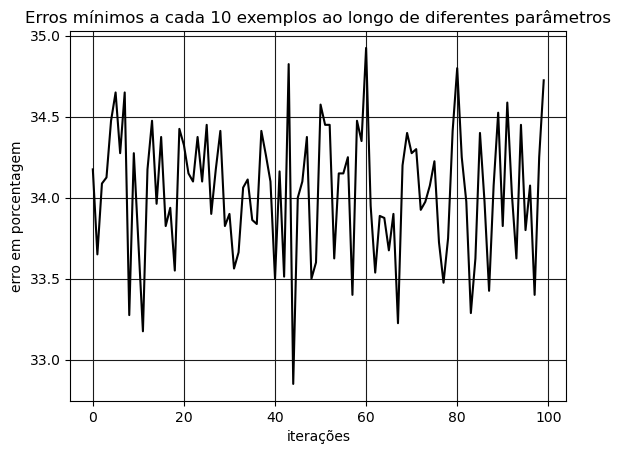

In [62]:
erro_filtrado = np.zeros(100)

for i in range (100):
    erro_filtrado[i] = np.min(e0[(10*i): (10 + 10*i)])

plt.plot(erro_filtrado, "k", label="LMS")
plt.xlabel("iterações")
plt.ylabel("erro em porcentagem")
plt.grid(axis="x", color="0.1")
plt.grid(axis="y", color="0.1")
plt.title(
    "Erros mínimos a cada 10 exemplos ao longo de diferentes parâmetros"
)

Text(0.5, 1.0, 'Erros mínimos a cada 100 exemplos ao longo de diferentes parâmetros')

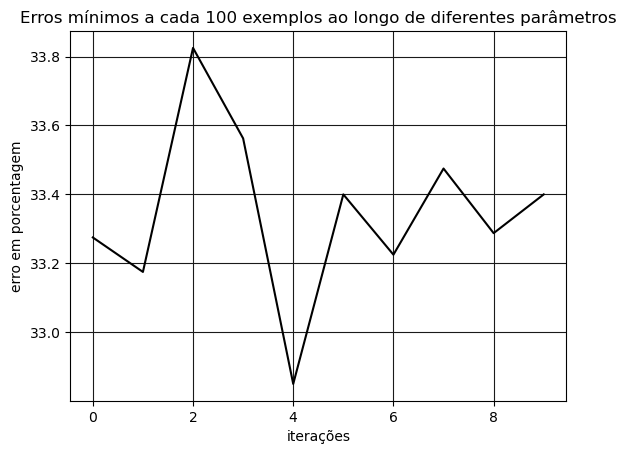

In [63]:
erro_filtrado2 = np.zeros(10)

for i in range (10):
    erro_filtrado2[i] = np.min(erro_filtrado[(10*i): (10 + 10*i)])

plt.plot(erro_filtrado2, "k", label="LMS")
plt.xlabel("iterações")
plt.ylabel("erro em porcentagem")
plt.grid(axis="x", color="0.1")
plt.grid(axis="y", color="0.1")
plt.title(
    "Erros mínimos a cada 100 exemplos ao longo de diferentes parâmetros"
)

Text(0.5, 1.0, 'Erros mínimos a cada 10 exemplos ao longo dos parâmetros diferentes parâmetros (zoom na região de 40 a 50 do primeiro gráfico)')

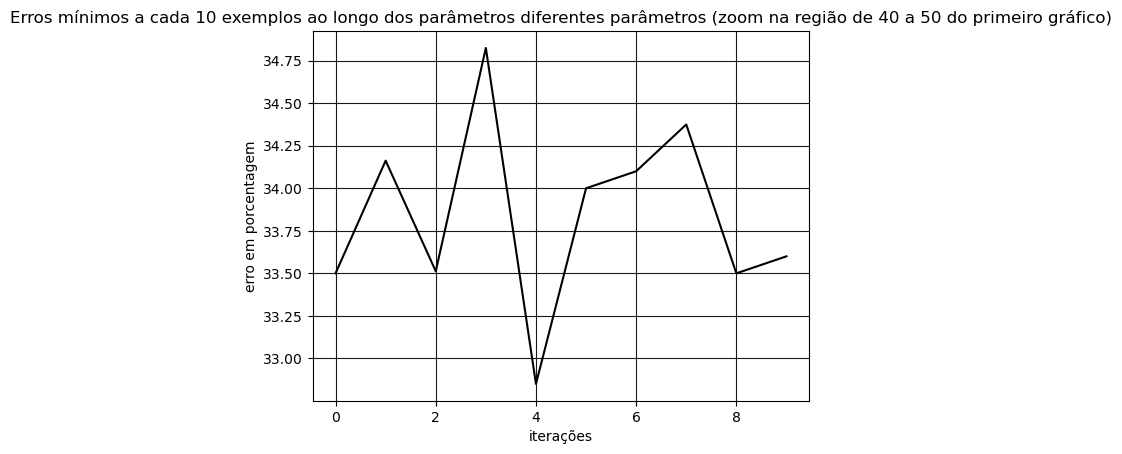

In [64]:
plt.plot(erro_filtrado[40 : 50], "k", label="LMS")
plt.xlabel("iterações")
plt.ylabel("erro em porcentagem")
plt.grid(axis="x", color="0.1")
plt.grid(axis="y", color="0.1")
plt.title(
    "Erros mínimos a cada 10 exemplos ao longo dos parâmetros diferentes parâmetros (zoom na região de 40 a 50 do primeiro gráfico)"
)

Text(0.5, 1.0, 'Erros ao longo de diferentes parâmetros (zoom na região de 440 a 450 do primeiro gráfico)')

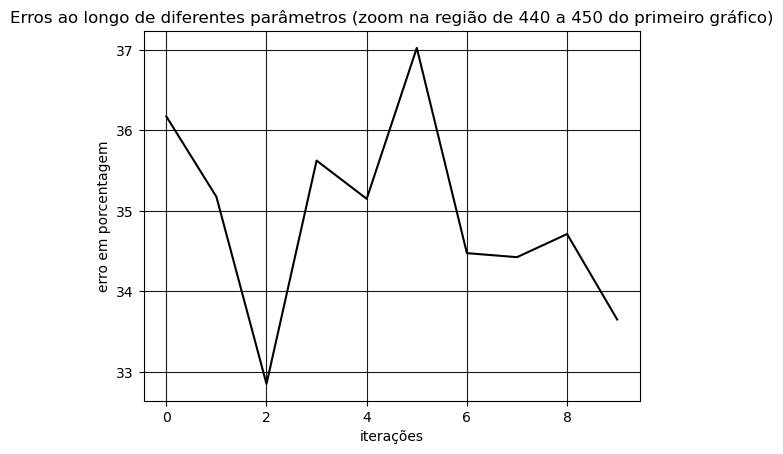

In [65]:
plt.plot(e0[440: 450], "k", label="LMS")
plt.xlabel("iterações")
plt.ylabel("erro em porcentagem")
plt.grid(axis="x", color="0.1")
plt.grid(axis="y", color="0.1")
plt.title(
    "Erros ao longo de diferentes parâmetros (zoom na região de 440 a 450 do primeiro gráfico)"
)

In [ ]:
print(np.argmin(e0))
#Na testagem que fizemos o indice do vetor com o menor erro era 442 correspondente aos volores que seguem abaixo
#Ne = 15
#Nb = 10
#eta = 0.03333